Final Project Part 2

Problem Statement: How is the HK-listed share price of ICBC associated with the price of a number of other assets as well as a few macro-economic and company-specific factors? 
Null Hypothesis: The share price of ICBC has no association with the price of the few assets or any of the macro-economic or company-specific factors under investigation.
Alternative Hypothesis: The share price of ICBC is associated with the price of a number of other assets and/or a few macro-economic and company-specific factors. 

Potential Methods and Models: I will attempt to use a multivariate linear regression model for this analysis, with the daily return of the share price of ICBC as the dependent variable and the daily return of a few other assets and the periodical change of a few macro-economic and company-specific factors as the independent variables. I will divide the data into a training set and a test set with an approximate 80%/20% breakdown. I will use the 20% of data in the test set to gauge the efficacy of the predictions made based on the model and parameters generated from the 80% of data in the training set.

Dataset: For the dependent variable, I have acquired 5 years of data of ICBC share price from Bloomberg (from July 2012 to July 2017). For the independent variables, I have also acquired the same 5 years of data on interest rates, interest rate differentials, equity index levels, foreign exchange spot levels, M2 growth YoY, New RMB Loans, company quarterly earnings, Tier 1 capital ratios, Non-Performing Loans (NPL) growth YoY from Bloomberg. 
With the above data, I finalized my dependent variable as the daily return of ICBC share price, and my independent variables as change in 1-year interest rate, change in 5-year minus 1-year interest rate differential, daily return of HSCEI index level, daily return of USDCNH spot fx level, China M2 growth year-on-year (YoY), China new loans growth YoY, ICBC earning growth YoY, ICBC Tier 1 capital ratio change from a year earlier and ICBC NPL growth YoY. 

Risks and Assumptions: One of the biggest challenges in handling the data comes from the fact that the independent variables are of different frequencies (some quarterly, some monthly and some daily). In order for them to match the daily frequency of the dependent variable (which is also the frequency I intend to have my analysis on primarily), I need to come up with certain assumptions and estimates on the datasets to fill in the missing values on a daily basis for the quarterly and monthly data, such as assuming a constant value throughout a certain period for some independent variables. This would inevitably introduce more uncertainties in the analysis.
Some other assumptions of the analysis include that asset prices have log-normal distributions, that the independent variables have low correlation with each other, the relationship between the dependent variable and the independent variables is linear, etc.

Goals and Criteria: The goal of this project is to reach a meaningful conclusion on how change in the independent variables can lead to change in the dependent variable, and that we can use this relationship to invest and achieve decent returns on the investment. If we can come up with a quantifiable relationship with linear coefficients of the independent variables laid out clearly for prediction on the dependent variable, and that the predicted outcomes based on the model and parameters from the training set are relatively close to the actual data in the test set, I would consider the analysis a success.

Understanding on the Project Domain: My understanding on the subject matter is that there is indeed an association among the changes in prices of different financial assets and several macro-economic and company-specific factors, with changes in certain asset prices and macro-economic/company-specific factors predictive of changes in other asset prices. I have not seen studies that incorporate factors across different domains (usually just one of asset prices/macro-economic factors/company-specific factors but not more than that). A multivariate linear regression model with factors from different domains is a good start to explore the association among the changes in different asset prices and a number of macro-economic/company-specific factors.

In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data_raw = pd.read_csv('pxd_6.csv')
data_raw.head()

,Date,ICBC_Log_Ret,IR_Chg_1Y,IR_Chg_5Y1Y,HSCEI_Log_Ret,USDCNH_Log_Ret,M2_Growth_YoY,New_Loans_Growth_YoY,Earning_Growth_YoY,T1_Cap_Ratio_Chg,NPL_Growth_YoY
0,7/20/2012,0.0167,-0.0002,0.0000,0.0058,0.0005,0.1364,0.451,0.152,0.0039,0.0317
1,7/23/2012,-0.0216,0.0004,-0.0007,-0.0317,0.0019,0.1364,0.451,0.152,0.0039,0.0317
2,7/24/2012,-0.0024,-0.0001,0.0006,-0.0059,0.0002,0.1364,0.451,0.152,0.0039,0.0317
3,7/25/2012,0.0073,0.0000,-0.0004,0.0002,0.0003,0.1364,0.451,0.152,0.0039,0.0317
4,7/26/2012,-0.0048,0.0002,-0.0003,-0.0009,-0.0004,0.1364,0.451,0.152,0.0039,0.0317


In [8]:
data_raw.tail()

,Date,ICBC_Log_Ret,IR_Chg_1Y,IR_Chg_5Y1Y,HSCEI_Log_Ret,USDCNH_Log_Ret,M2_Growth_YoY,New_Loans_Growth_YoY,Earning_Growth_YoY,T1_Cap_Ratio_Chg,NPL_Growth_YoY
1226,7/17/2017,0.0038,0.0000,0.0000,0.0051,-0.0003,0.094,0.1159,0.0,0.0006,0.0164
1227,7/18/2017,0.0019,0.0003,-0.0001,-0.0026,-0.0021,0.094,0.1159,0.0,0.0006,0.0164
1228,7/19/2017,0.0075,0.0001,0.0000,0.0097,0.0014,0.094,0.1159,0.0,0.0006,0.0164
1229,7/20/2017,0.0075,-0.0002,-0.0002,-0.0013,-0.0005,0.094,0.1159,0.0,0.0006,0.0164
1230,7/21/2017,-0.0037,0.0001,0.0000,-0.0055,0.0008,0.094,0.1159,0.0,0.0006,0.0164


In [10]:
len(data_raw)

1231

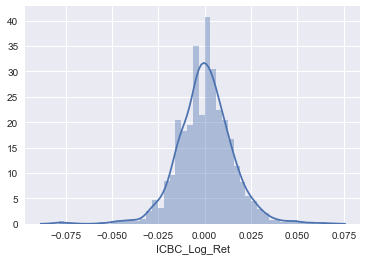

In [18]:
sns.distplot(data_raw["ICBC_Log_Ret"])

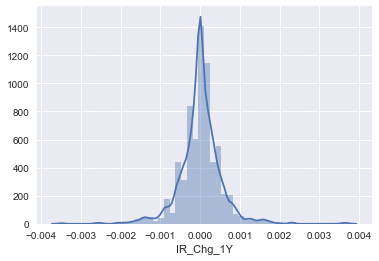

In [20]:
sns.distplot(data_raw["IR_Chg_1Y"])

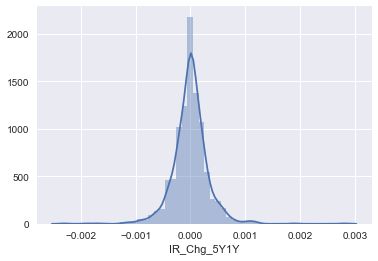

In [22]:
sns.distplot(data_raw["IR_Chg_5Y1Y"])

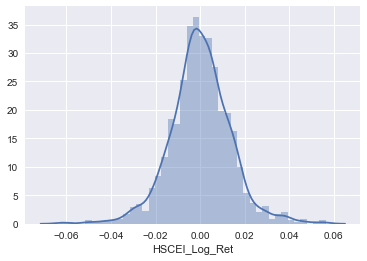

In [24]:
sns.distplot(data_raw["HSCEI_Log_Ret"])

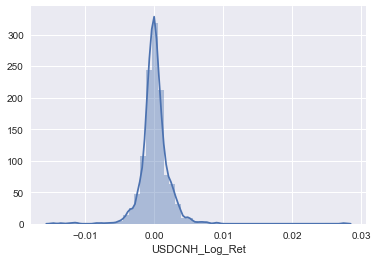

In [26]:
sns.distplot(data_raw["USDCNH_Log_Ret"])

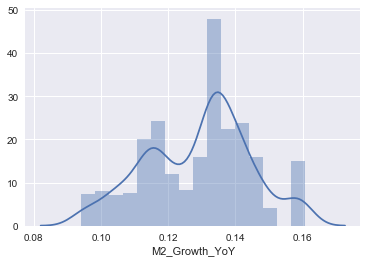

In [28]:
sns.distplot(data_raw["M2_Growth_YoY"])

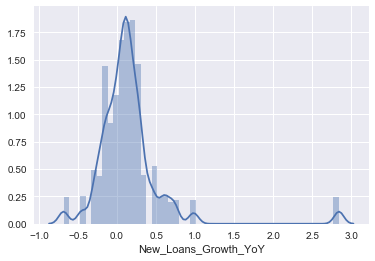

In [31]:
sns.distplot(data_raw["New_Loans_Growth_YoY"])

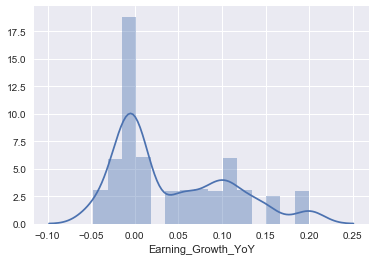

In [33]:
sns.distplot(data_raw["Earning_Growth_YoY"])

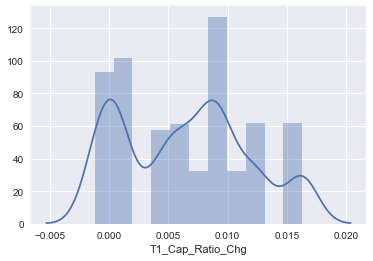

In [35]:
sns.distplot(data_raw["T1_Cap_Ratio_Chg"])

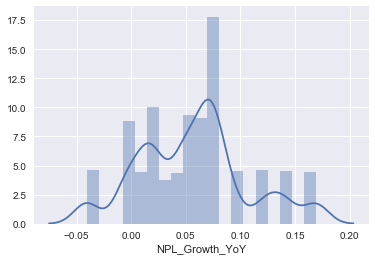

In [36]:
sns.distplot(data_raw["NPL_Growth_YoY"])

In [30]:
data_raw.corr()

,ICBC_Log_Ret,IR_Chg_1Y,IR_Chg_5Y1Y,HSCEI_Log_Ret,USDCNH_Log_Ret,M2_Growth_YoY,New_Loans_Growth_YoY,Earning_Growth_YoY,T1_Cap_Ratio_Chg,NPL_Growth_YoY
ICBC_Log_Ret,1.000000,-0.034661,0.156918,0.870885,-0.060591,-0.022820,-0.065739,0.043155,-0.013082,-0.060628
IR_Chg_1Y,-0.034661,1.000000,-0.357682,-0.021264,-0.016022,0.051528,0.008503,0.029066,-0.021515,-0.044362
IR_Chg_5Y1Y,0.156918,-0.357682,1.000000,0.177006,-0.016581,-0.033022,-0.004501,-0.003012,-0.017993,-0.009313
HSCEI_Log_Ret,0.870885,-0.021264,0.177006,1.000000,-0.059301,-0.025791,-0.043422,0.036459,-0.023278,-0.060241
USDCNH_Log_Ret,-0.060591,-0.016022,-0.016581,-0.059301,1.000000,-0.022410,0.049915,-0.047603,0.012794,0.050776
M2_Growth_YoY,-0.022820,0.051528,-0.033022,-0.025791,-0.022410,1.000000,-0.009178,0.501407,-0.053860,-0.074634
New_Loans_Growth_YoY,-0.065739,0.008503,-0.004501,-0.043422,0.049915,-0.009178,1.000000,-0.130572,0.025891,0.166635
Earning_Growth_YoY,0.043155,0.029066,-0.003012,0.036459,-0.047603,0.501407,-0.130572,1.000000,-0.251809,-0.199396
T1_Cap_Ratio_Chg,-0.013082,-0.021515,-0.017993,-0.023278,0.012794,-0.053860,0.025891,-0.251809,1.000000,0.469405
NPL_Growth_YoY,-0.060628,-0.044362,-0.009313,-0.060241,0.050776,-0.074634,0.166635,-0.199396,0.469405,1.000000


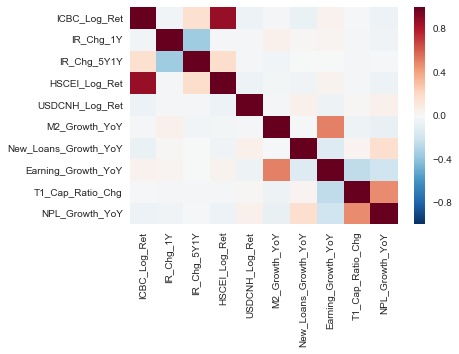

In [16]:
sns.heatmap(data_raw[["ICBC_Log_Ret", "IR_Chg_1Y", "IR_Chg_5Y1Y", "HSCEI_Log_Ret", "USDCNH_Log_Ret", "M2_Growth_YoY", "New_Loans_Growth_YoY", "Earning_Growth_YoY", "T1_Cap_Ratio_Chg", "NPL_Growth_YoY"]].corr())

Further comments on data: I processed and cleaned up the data so that all data have the same frequency (daily) for the linear regression analysis. In the process, I have made assumptions on the lower frequency data in order to fill in the missing values. For the quarterly and monthly data, I used the same values throughout the period where there are no available data. In this case, the predictive power of such lower frequency data might be reduced significantly because of the stale values throughout the period during which the dependent variable (daily return of ICBC share price) changes on a daily basis. This limitation in the independent variables is difficult to overcome because macro-economic data or company-specific data do not get published on a more frequent basis. An alternative solution for this issue is to use linear interpolation or other estimation methods to come up with non-constant values to fill up the data in the period, however, there is no proven advantage of taking on such an approach and this could even potentially create more noises and uncertainties in the analysis on the association among the dependent variable and the independent variables.  